LINK VIDIO PENJELASAN : https://binusianorg-my.sharepoint.com/personal/evelyn_untariady_binus_ac_id/_layouts/15/guestaccess.aspx?share=EQipa5b6zUJAloU1eVeLWZYBgy7furrzoeq26MY9H80QmQ&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=NulGdz

[LO 1, LO 2 – 30 Points] Buatlah pemodelan machine learning dengan menerapkan pipeline yang mencakup
seluruh proses preprocessing data sebelum melakukan klasifikasi. Lakukan pelatihan menggunakan dua algoritma
berbeda, kemudian bandingkan performanya dan pilih algoritma terbaik untuk disimpan dalam format pickle.
Pastikan seluruh rangkaian proses termasuk laporan klasifikasi dari masing-masing model terdokumentasi lengkap
dalam file .ipynb.

In [53]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("ObesityDataSet2.csv", delimiter=',')

In [55]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


# EDA

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [57]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Memisahkan categorical columns dan numerical columns

In [58]:
cols = df.columns
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC','SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesedad']

print(num_cols)
print(cat_cols)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesedad']


### Cek Duplikat Data

In [59]:
df.duplicated().sum()

np.int64(10)

In [60]:
df = df.drop_duplicates()

### Melakukan pengecekan datatype dan dirty data dengan melihat unique value dari masing - masing kolom

In [61]:
for i in cols :
    print(i, df[i].unique())

Gender ['Female' 'Male']
Age ['24' '23' '21' '22' '26' '18' '25' '20' '32' '20 years' '19' '38' '34'
 '44' '39' '22 years' '41' '31' '17 years' '17' '29' '42' '27' '16'
 '25 years' '40' '21 years' '33' '30' '37' '35' '36' '15' '19 years' '28'
 '55' '46' '36 years' '26 years' '45' '33 years' '43' '51' '48' '23 years'
 '14']
Height [1.58 1.65 1.69 1.61 1.68 1.62 1.74 1.66 1.85 1.75 1.76 1.83 1.81 1.57
 1.63 1.6  1.78 1.84 1.72 1.77 1.8  1.71 1.5  1.64 1.7  1.87 1.88 1.91
 1.82 1.9  1.59 1.67 1.79 1.54 1.73 1.53 1.89 1.55 1.56 1.52 1.51 1.93
 1.86 1.95 1.92 1.45 1.49]
Weight [ 65.29  66.    51.26  65.    82.64 104.85  49.95  55.    82.6   50.
  68.    85.23  76.7   74.    87.91 105.01 152.72  85.32  44.32  58.
  42.85  77.93 106.88 133.67  89.67  80.    65.42 115.    48.    60.
  62.    89.28 152.22 108.25 121.86  91.8   90.    77.35  68.65  53.
  86.93  69.46 121.74  95.    70.    79.49  82.01 111.72 106.33 121.53
  82.47 106.51 117.47 129.85  59.61 119.21 128.71 114.48  59.9  110.17
 11

In [62]:
df.isna().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

In [63]:
print(df['FCVC'].isna().mean() * 100) 
print(df['MTRANS'].isna().mean() * 100) 

3.5372848948374758
2.48565965583174


Dari sini dapat dilihat bahwa :
1. Kolom Age, yang dimana merupakan kolom numerical, dituliskan dalam bentuk string dan masih terdapat dirty value.
2. Terdapat missing value di kolom FCVC dan MTRANS

Dikarenakan persentase dari missing value di kolom FCVC dan MTRANS tidak besar (3.5% dan 2.5%) akan dilakukan imputasi.

### Visualisasi Tingakt Obesitas

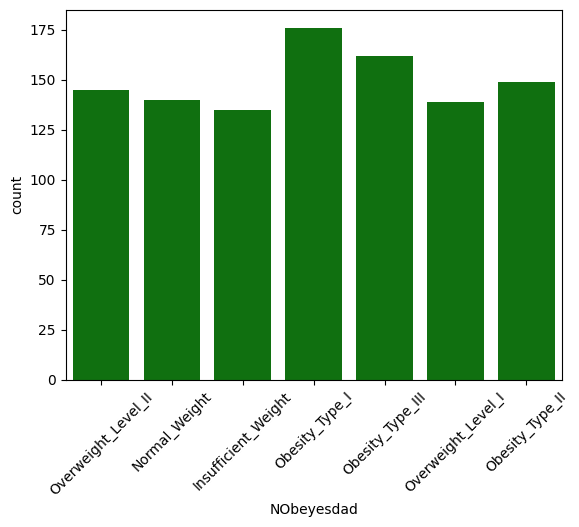

In [64]:
sns.countplot(x='NObeyesdad', data=df, color = 'green')
plt.xticks(rotation = 45)
plt.show()

Dapat dilihat dari graph di atas bahwa kolom NObeyesdad dalam dataset yang digunakan balance dan tingkat obesitas terbanyak dimiliki oleh Obesity_Type_I

### Memperbaiki dirty value di kolom Age

In [65]:
df['Age_cleaned'] = df['Age'].str.extract(r'(\d+)')

df['Age_cleaned'].unique()

array(['24', '23', '21', '22', '26', '18', '25', '20', '32', '19', '38',
       '34', '44', '39', '41', '31', '17', '29', '42', '27', '16', '40',
       '33', '30', '37', '35', '36', '15', '28', '55', '46', '45', '43',
       '51', '48', '14'], dtype=object)

In [66]:
df['Age'] = df['Age_cleaned'].astype(float)

In [67]:
data = df.drop('Age_cleaned', axis=1)

In [68]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24.0,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23.0,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21.0,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22.0,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23.0,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


# Split Data

### Split data set menjadi train data dan test data

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x = data.drop('NObeyesdad', axis = 1)
y = data['NObeyesdad']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
x_train.shape

(836, 16)

In [73]:
y_train.shape

(836,)

### Distribution Checking

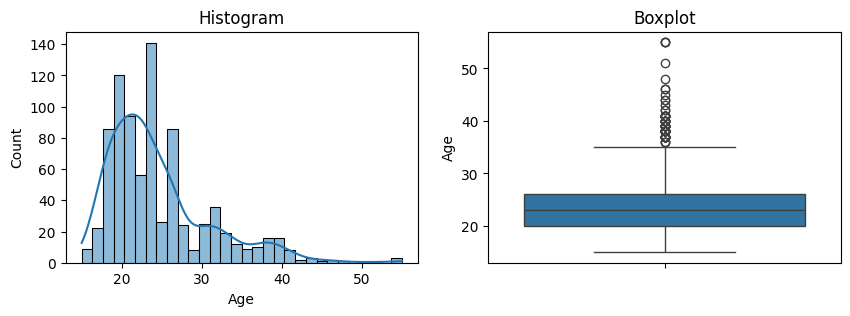

Skewness: 1.4712272990816104
Kurtosis: 2.471040355104221


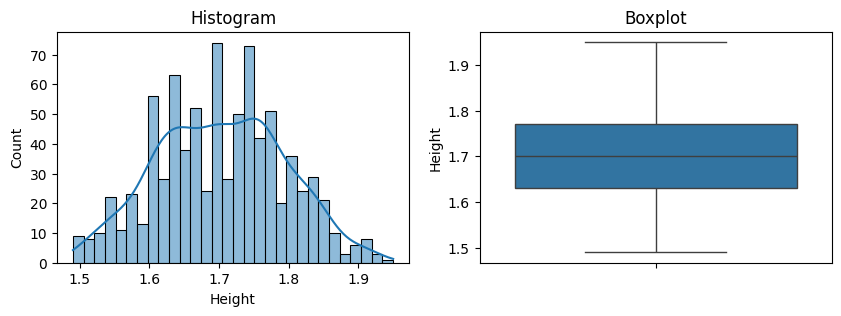

Skewness: 0.028692894489920958
Kurtosis: -0.5595091588083014


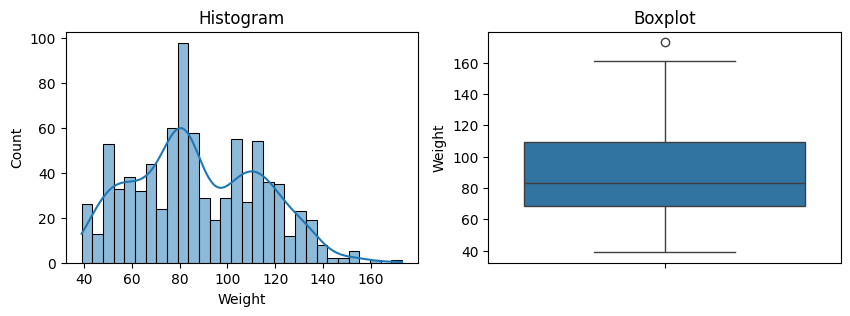

Skewness: 0.2249959851106605
Kurtosis: -0.6900970631713523


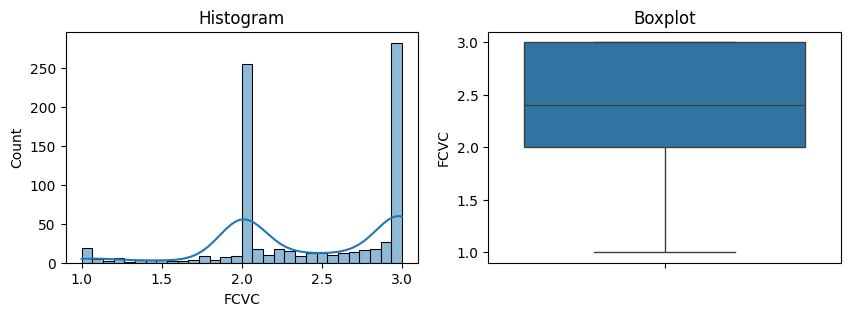

Skewness: -0.4780292431407424
Kurtosis: -0.5916380301700443


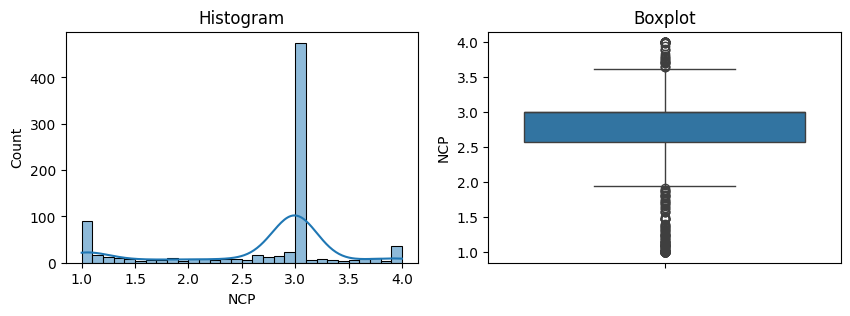

Skewness: -1.030870051419527
Kurtosis: 0.15916387228493445


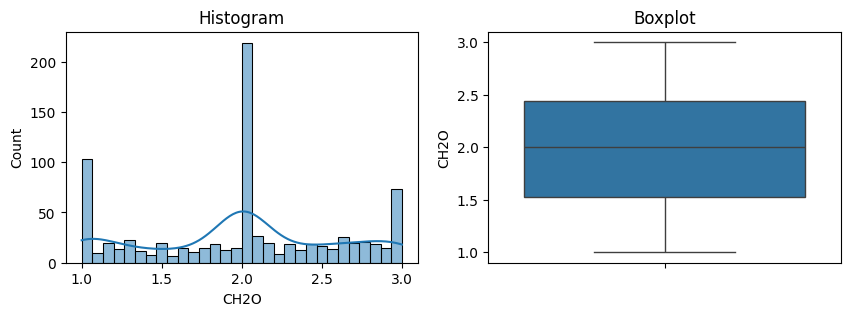

Skewness: -0.07695117832661148
Kurtosis: -0.8787320325847525


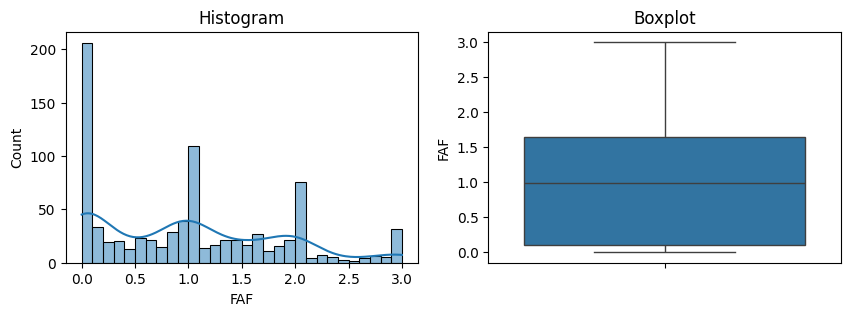

Skewness: 0.54687383158697
Kurtosis: -0.5676524088943307


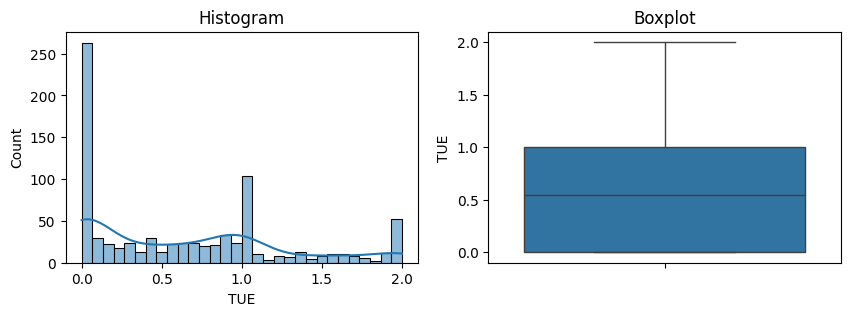

Skewness: 0.694560743014045
Kurtosis: -0.5463011199730121


In [74]:
def check_dist(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title('Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_dist(x_train, num_cols)

Dari histogram, boxplot dan nilai skewness di atas dapat dilihat bahwa terdapat beberapa kolom dengan distribusi **tidak normal** seperti kolom Age, FAF dan sebagainya.

Untuk kolom yang memiliki missing value (FCVC), distribusinya cenderung normal dengan skewness bernilai 0.4. Sehingga untuk imputation missing value akan digunakan nilai **mean**

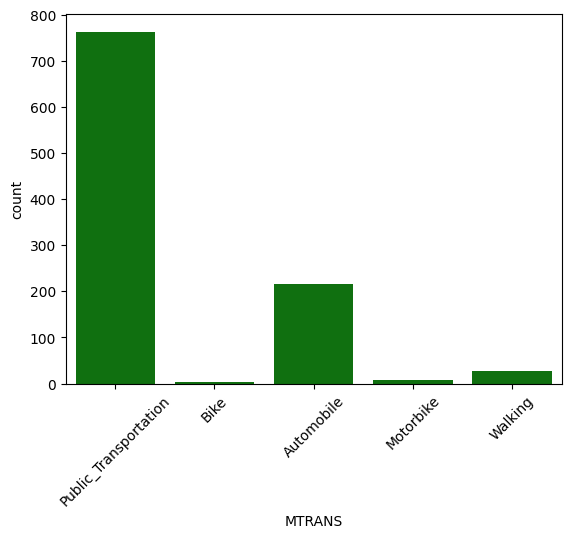

In [75]:
sns.countplot(x='MTRANS', data=df, color = 'green')
plt.xticks(rotation = 45)
plt.show()

Dari graph di atas dapat dilihat bahwa kolom MTRANS memiliki 5 buah value unique, sehingga akan dilakukan imputasi missing value dengan modusnya dan encoding dengan One Hot Encoder

# Create Preprocessing Pipeline

### Missing Value Imputation - Numerical dan Categorical dan Encoding


Imputasi missing value di x_train dan y_train dengan nilai mean dari x_train

In [76]:
x_train['FCVC'].value_counts()

FCVC
3.00    260
2.00    227
1.00     16
2.05      7
2.88      6
       ... 
1.06      1
1.07      1
2.64      1
2.78      1
2.14      1
Name: count, Length: 134, dtype: int64

In [77]:
x_train['MTRANS'].value_counts()

MTRANS
Public_Transportation    613
Automobile               177
Walking                   21
Motorbike                  6
Bike                       4
Name: count, dtype: int64

In [78]:
x_train['CALC'].value_counts()

CALC
Sometimes     553
no            257
Frequently     26
Name: count, dtype: int64

In [79]:
x_train['CAEC'].value_counts()

CAEC
Sometimes     689
Frequently    101
Always         24
no             22
Name: count, dtype: int64

In [80]:
x_train['SMOKE'].value_counts()

SMOKE
no     817
yes     19
Name: count, dtype: int64

In [81]:
x_train['Gender'].value_counts()

Gender
Male      425
Female    411
Name: count, dtype: int64

In [82]:
x_train['SCC'].value_counts()

SCC
no     794
yes     42
Name: count, dtype: int64

In [83]:
x_train['FAVC'].value_counts()

FAVC
yes    738
no      98
Name: count, dtype: int64

In [84]:
x_train['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    691
no     145
Name: count, dtype: int64

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

numeric_preprocess = Pipeline([('num_imputer', SimpleImputer(strategy='mean'))])

ordinal_preprocess= Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')),
                                  ('cat_encoder', OrdinalEncoder(categories=[['Male', 'Female'],
                                                                            ['no', 'yes'],
                                                                            ['no', 'yes'],
                                                                            ['no', 'Sometimes', 'Frequently', 'Always'],
                                                                            ['no', 'yes'],
                                                                            ['no', 'yes'],
                                                                            ['no', 'Sometimes', 'Frequently', 'Always']]))])
onehot_preprocess = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
])
                                  

In [86]:
from sklearn.compose import ColumnTransformer
preprocess=ColumnTransformer(transformers=[
    ('numPreprocess', numeric_preprocess, num_cols), 
    ('ordinal_catPreprocess', ordinal_preprocess,(['Gender','family_history_with_overweight','FAVC', 'CAEC', 'SMOKE' ,'SCC', 'CALC'])),
    ('ohe_catPreprocess', onehot_preprocess, ['MTRANS'])
    ],
    remainder='drop')

In [87]:
preprocess

ColumnTransformer(transformers=[('numPreprocess',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer())]),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE']),
                                ('ordinal_catPreprocess',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]))]),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']),
                                ('ohe_catPreprocess',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MTRANS'])])

In [88]:
x_train_preprocess=preprocess.fit_transform(x_train)

In [89]:
x_train.shape

(836, 16)

In [90]:
x_train_preprocess.shape

(836, 20)

In [91]:
x_train.iloc[3]

Gender                                             Male
Age                                                18.0
Height                                             1.76
Weight                                            85.05
family_history_with_overweight                      yes
FAVC                                                yes
FCVC                                               2.85
NCP                                                 3.0
CAEC                                          Sometimes
SMOKE                                                no
CH2O                                               2.88
SCC                                                  no
FAF                                                 1.0
TUE                                               0.429
CALC                                          Sometimes
MTRANS                            Public_Transportation
Name: 348, dtype: object

In [92]:
x_train_preprocess[3]

array([18.   ,  1.76 , 85.05 ,  2.85 ,  3.   ,  2.88 ,  1.   ,  0.429,
        0.   ,  1.   ,  1.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
        0.   ,  0.   ,  1.   ,  0.   ])

# Modeling

## Model 1 - Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

model1 = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', RandomForestClassifier(criterion= 'gini',max_depth=4))])

In [94]:
model1.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numPreprocess',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('ordinal_catPreprocess',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OrdinalEncoder(categories=[['Male',
                                                                                               'Female'],
                                                                                              ['...
                                                                                               'yes'],
                                                                                              ['no',
                                                                                               'Sometimes',
                                                                                               'Frequently',
                                                                                               'Always']]))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC']),
                                                 ('ohe_catPreprocess',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MTRANS'])])),
                ('classifier', RandomForestClassifier(max_depth=4))])

In [95]:
y_pred1 = model1.predict(x_test)

In [96]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred1))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.96      0.81        26
      Normal_Weight       0.78      0.51      0.62        41
     Obesity_Type_I       0.65      0.61      0.63        36
    Obesity_Type_II       0.71      0.89      0.79        27
   Obesity_Type_III       0.90      1.00      0.95        28
 Overweight_Level_I       0.58      0.68      0.62        22
Overweight_Level_II       0.73      0.53      0.62        30

           accuracy                           0.72       210
          macro avg       0.72      0.74      0.72       210
       weighted avg       0.72      0.72      0.71       210



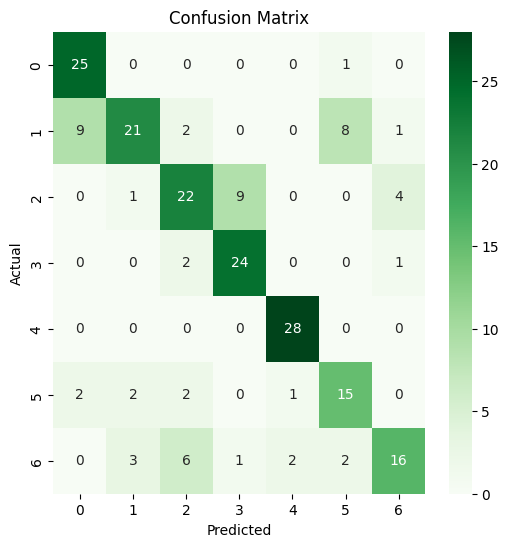

In [97]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Dari hasil di atas, dapat dilihat bahwa model random forest memiliki akurasi sebesar 0.72. Dimana F1 score tertinggi dimiliki oleh Obesity_Type_III. Hal ini dapat dipastikan juga melalui jumlah False Negative dan False Positive yang sedikit untuk kelas tersebut. Di sisi lain Overweight_Level_I, Overweight_Level_II dan Normal_Weight memiliki F1 score yang kecil, di angka 0.62. Hal ini dapat dilihat dari jumlah False Negative dan False Positive yang banyak di kelas tersebut

## Model 2 - XGBoost

In [98]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

model2 = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', XGBClassifier())])

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [100]:
model2.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numPreprocess',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('ordinal_catPreprocess',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OrdinalEncoder(categories=[['Male',
                                                                                               'Female'],
                                                                                              ['...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [101]:
y_pred_encoded = model2.predict(x_test)

In [102]:
from sklearn.metrics import classification_report
y_pred2 = le.inverse_transform(y_pred_encoded)
print('\nClassification Report\n')
print(classification_report(y_test, y_pred2))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        26
      Normal_Weight       0.93      0.95      0.94        41
     Obesity_Type_I       0.85      0.97      0.91        36
    Obesity_Type_II       1.00      0.93      0.96        27
   Obesity_Type_III       1.00      1.00      1.00        28
 Overweight_Level_I       0.81      0.77      0.79        22
Overweight_Level_II       0.89      0.83      0.86        30

           accuracy                           0.92       210
          macro avg       0.93      0.92      0.92       210
       weighted avg       0.93      0.92      0.92       210



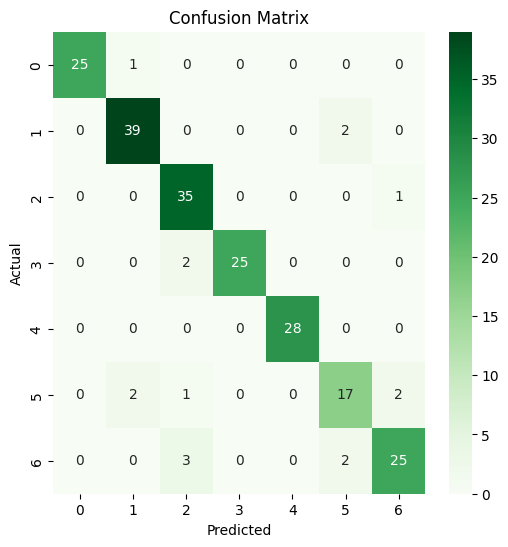

In [103]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Dari hasil di atas, dapat dilihat bahwa model XGBoost memiliki akurasi sebesar 0.92. Dimana F1 score tertinggi dimiliki oleh Obesity_Type_III. Di sisi lain F1 score untuk kelas Overweight_Level_I, Overweight_Level_II dan Normal_Weight mengalami peningkatan dari model random forenst, di angka 0.79, 0.86, 0.94. Hal ini dapat dilihat dari jumlah False Negative dan False Positive yang lebih sedikit di kelas tersebut dibanding di model random forest

In [104]:
filename = 'model_xgboost.pkl'
pkl.dump(model2, open(filename, 'wb'))

In [105]:
filename2 = 'label_encoder.pkl'
pkl.dump(le, open(filename2, 'wb'))